In [ ]:
!pip install mat4py
import pandas as pd
import os
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def BT19ECE036_dataset_div_shuffle(filepath, train_test_ratio=0.2):
  ext = os.path.splitext(filepath)[1]
  # import the data
  if ext==".csv":
    data = pd.read_csv(filepath)
  elif ext==".xlsx":
    data = pd.read_excel(filepath)
  elif ext==".mat":
    load_data = loadmat(filepath) 
    datamat = load_data["accidents"]
    data = pd.DataFrame(datamat["hwydata"],columns=datamat["hwyheaders"])
    states = [x[0] for x in datamat["statelabel"]]
    data.insert(loc = 1, column = "State", value=states)
  else:
    print("File not found")
    return None
  train_frac = 1 - train_test_ratio
  test_frac = train_test_ratio
  train = data.sample(frac = train_frac)
  test = data.sample(frac = test_frac)
  return train, test

In [ ]:
train, test = BT19ECE120_dataset_div_shuffle("/content/drive/MyDrive/Drive/Study/VNIT/Year4/Sem7/Machine Learning/Lab/Exp2/Matlab_accidents.mat")
train.head()

,Census ID,State,Centroid Longitude,Centroid Latitude,Traffic fatalities,Licensed drivers (thousands),Registered vehicles (thousands),Vehicle-miles traveled (millions),Miles traveled per vehicle,Fatalities per 100K licensed drivers,Fatalities per 100K registered vehicles,Fatalities per 100M vehicle-miles traveled,Fatalities involving high blood alcohol,Percent Alcohol-Related,Total Population,Urban Population,Rural Population,Pct Urban Population
39,51.0,Virginia,-78.949416,37.546013,925.0,5112.523,6572.883,78877.0,12000.365745,18.092828,14.072972,1.172712,307.0,33.189189,7078515.0,5166427.0,1912088.0,72.987442
10,33.0,New Hampshire,-71.559103,43.907990,171.0,985.775,1244.631,13216.0,10618.408187,17.346758,13.739012,1.293886,51.0,29.824561,1235786.0,731352.0,504434.0,59.181120
37,18.0,Indiana,-86.577065,39.448159,947.0,4521.329,5678.318,72713.0,12805.376522,20.945169,16.677474,1.302381,254.0,26.821542,6080485.0,4303180.0,1777305.0,70.770342
21,19.0,Iowa,-93.762335,42.132789,390.0,2003.723,3509.431,31538.0,8986.641994,19.463768,11.112913,1.236603,91.0,23.333333,2926324.0,1786683.0,1139641.0,61.055543
14,54.0,West Virginia,-80.274868,38.850586,411.0,1292.036,1415.954,20302.0,14338.036405,31.810259,29.026367,2.024431,114.0,27.737226,1808344.0,833378.0,974966.0,46.085148


In [ ]:
trainX = train[['Licensed drivers (thousands)','Registered vehicles (thousands)','Vehicle-miles traveled (millions)']]
trainy = np.array(train['Traffic fatalities'])
testX = test[['Licensed drivers (thousands)','Registered vehicles (thousands)','Vehicle-miles traveled (millions)']]
testy = np.array(test['Traffic fatalities'])

In [ ]:
for column in trainX:
  trainX[column] = trainX[column]/np.amax(trainX[column])
for column in testX:
  testX[column] = testX[column]/np.amax(testX[column])
trainX = np.array(trainX)
testX = np.array(testX)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def linreg_pseudoinv(trainX, trainy, testX, testy):
  train_ones = np.ones([trainX.shape[0],1])
  theta_train = np.hstack((train_ones,trainX))
  weight_opt = np.matmul(np.linalg.pinv(theta_train),trainy)
  test_ones = np.ones([testX.shape[0],1])
  theta_test = np.hstack((test_ones,testX))
  y_pred = np.matmul(theta_test,weight_opt)
  plt.plot(testy)
  plt.plot(y_pred)
  print("Mean Squared Error: ",mean_squared_error(testy, y_pred))
  print("Root Mean Squared Error: ",mean_squared_error(testy, y_pred, squared = False))
  print("Mean Absolute Error: ",mean_absolute_error(testy, y_pred))

Mean Squared Error:  276463.64506550005
Root Mean Squared Error:  525.7981029496968
Mean Absolute Error:  432.73731367850405


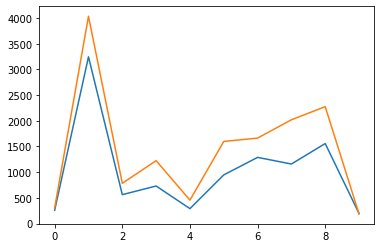

In [ ]:
linreg_pseudoinv(trainX, trainy, testX, testy)

In [ ]:
def gradient_descent(trainX, trainy, testX, testy, iterations=1000, learning_rate=0.01):
  X = np.concatenate((trainX, testX), axis=0)
  y = np.concatenate((trainy, testy))
  theta = np.random.randn(len(X[0]), 1)

  y_new = np.reshape(y, (len(y), 1))   
  cost_lst = []
  #vectorX = np.c_[np.ones((len(X), 1)), X]
  m = len(X)
  for i in range(iterations):
      gradients = 2/m * X.T.dot(X.dot(theta) - y_new)
      theta = theta - learning_rate * gradients
      y_pred = X.dot(theta)
      cost_value = 1/(2*len(y))*((y_pred - y)**2) 
      #Calculate the loss for each training instance
      total = 0
      for i in range(len(y)):
          total += cost_value[i][0] 
          #Calculate the cost function for each iteration
      cost_lst.append(total)
  plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
  plt.title('Cost function Graph')
  plt.xlabel('Number of iterations')
  plt.ylabel('Cost')
  return theta

array([[1275.28102036],
       [1110.17877318],
       [1411.38276165]])

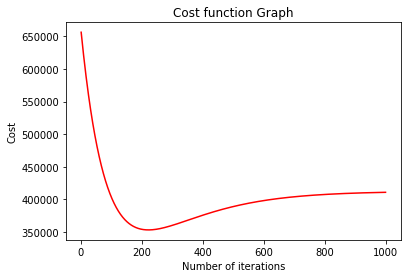

In [ ]:
gradient_descent(trainX, trainy, testX, testy)